<a href="https://colab.research.google.com/github/derek-shing/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_2_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling

In this Sprint Challenge you will use data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the Sprint Challenge!
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html]) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

## Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

## Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [124]:
cell_phones.head(1)
cell_phones.shape
cell_phones.isnull().sum()

geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [125]:
population.head(1)

,geo,time,population_total
0,afg,1800,3280000


In [0]:
cell_phones_study = pd.merge(cell_phones,population,how='inner',on=['geo','time'])

In [127]:
cell_phones_study.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [128]:
cell_phones_study.head()

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


## Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [0]:
cell_phones_study['per_person'] = cell_phones_study['cell_phones_total']/cell_phones_study['population_total']



In [134]:
cell_phones_study[(cell_phones_study.geo=='usa') &(cell_phones_study.time==2017)]

AttributeError: ignored

Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [135]:
cell_phones_study.GEO.value_counts()

ind    46
isl    46
ken    46
fin    46
cmr    46
rou    46
cze    46
mng    46
bgr    46
aut    46
est    46
nga    46
lso    46
mwi    46
gab    46
irl    46
bih    46
slv    46
mrt    46
phl    46
idn    46
khm    46
grc    46
lka    46
nam    46
jam    46
ukr    46
com    46
ltu    46
arm    46
chl    46
lao    46
bdi    46
arg    46
tha    46
pan    46
swe    46
jpn    46
dnk    46
mdv    46
civ    46
btn    46
sen    46
nic    46
lux    46
kgz    46
kir    46
uzb    46
ury    46
can    46
pry    46
aze    46
sdn    46
ben    46
mex    46
syc    46
cri    46
hrv    46
blr    46
nor    46
mdg    46
egy    46
chn    46
hti    46
cpv    46
vut    46
bra    46
nzl    46
bgd    46
mda    46
gha    46
slb    46
prt    46
geo    46
irq    46
lva    46
hnd    46
zwe    46
afg    46
kaz    46
ner    46
cyp    46
che    46
omn    46
sur    46
cub    46
mar    46
moz    46
gtm    46
svk    46
aus    46
guy    46
tto    46
fra    46
bwa    46
bhr    46
kwt    46
bol    46
dji    46
mmr    46


In [0]:
pd.options.display.max_rows = 500

In [0]:
cell_phones_study=cell_phones_study.rename(columns={'geo':'GEO'})

## Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [136]:
cell_phones_study.describe()

,time,cell_phones_total,population_total,per_person
count,"8,590.0","8,590.0","8,590.0","8,590.0"
mean,"1,994.1934807916182","9,004,949.642905472","29,838,230.581722934",0.27963855580591535
std,14.257974607310278,"55,734,084.872176506","116,128,377.47477297",0.45424665621404714
min,"1,960.0",0.0,"4,433.0",0.0
25%,"1,983.0",0.0,"1,456,148.0",0.0
50%,"1,995.0","6,200.0","5,725,062.5",0.0015636266438163813
75%,"2,006.0","1,697,652.0","18,105,812.0",0.4611491855201403
max,"2,017.0","1,474,097,000.0","1,409,517,397.0",2.490242818521353


In [137]:
import numpy as np
cell_phones_study.describe(exclude=np.number)

,GEO
count,8590
unique,195
top,ind
freq,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [139]:
condition=cell_phones_study['time']==2017
cell_phones_study.loc[condition].sort_values(by='cell_phones_total', ascending=False).head(5)

,GEO,time,cell_phones_total,population_total,per_person
1496,chn,2017,"1,474,097,000.0",1409517397,1.0458168186766978
3595,ind,2017,"1,168,902,277.0",1339180127,0.8728491809526382
3549,idn,2017,"458,923,202.0",263991379,1.738402230172827
8134,usa,2017,"395,881,000.0",324459463,1.2201246847283354
1084,bra,2017,"236,488,548.0",209288278,1.1299655683535224


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [0]:
condition = (cell_phones_study['cell_phones_total']>cell_phones_study['population_total']) & (cell_phones_study['GEO']=='chn')

In [141]:
cell_phones_study[condition]

,GEO,time,cell_phones_total,population_total,per_person
1496,chn,2017,"1,474,097,000.0",1409517397,1.0458168186766978


In [0]:
condition2 = (cell_phones_study['cell_phones_total']>cell_phones_study['population_total']) & (cell_phones_study['GEO']=='usa')

In [143]:
cell_phones_study[condition2].sort_values(by='time').head(1)

,GEO,time,cell_phones_total,population_total,per_person
8131,usa,2014,"355,500,000.0",317718779,1.118914031833164


**2014 was the frist year that USA had more cell phones than people**

## Part 4. Reshape data

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [0]:
pt = cell_phones_study.pivot_table(index='GEO',columns='time', values='cell_phones_total')

In [0]:
pt

In [0]:
countrycode=['chn', 'ind', 'usa', 'idn', 'bra']

In [0]:
countryname={'chn':'China', 'ind':'India', 'usa':'United States', 'idn':'Indonesia', 'bra':'Brazil' }


In [0]:
pt=pt[pt.index.isin(countrycode)]

In [0]:
pt = pt.rename(countryname)

In [184]:
yearrange =list(range(2007,2018))
pt2=pt[yearrange]
pt2

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
GEO,,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0"


In [185]:
pt2.shape

(5, 11)

#### OPTIONAL BONUS QUESTION!

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

In [186]:
pt2['increase']=pt2[2017]-pt2[2007]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [188]:
pt2.sort_values(by='increase', ascending=False)

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,increase
GEO,,,,,,,,,,,,
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0","935,282,277.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0","926,791,000.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0","365,536,321.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0","146,581,000.0"
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0","115,508,445.0"


**India had 935,282,277 more cell phones in 2017 versus 2007**

If you have the time and curiosity, what other questions can you ask and answer with this data?

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() 


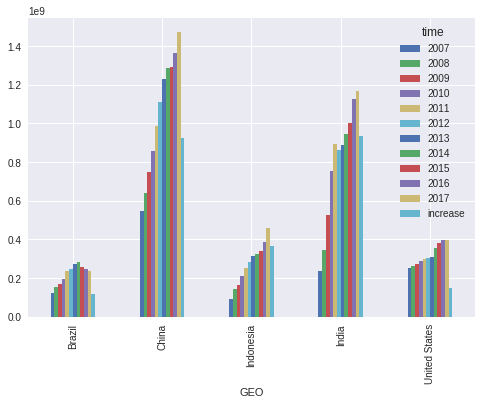

In [200]:
pt2.plot(kind='bar')